In [34]:
!pip install matplotlib numpy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import json


In [36]:
def plot_active_layers(data: dict, ax: plt.Axes):
    """
        Plot the active and inactive layers at each timestep
        x axis: time
        y axis: layer name
    """
    layer_names = data['adapter_base_names']
    activations = data['masks']
    # activations is a list of lists, where each outer index corresponds to a timestep
    # and each inner index corresponds to a layer
    # create a matrix where rows correspond to layers and columns correspond to timesteps
    activation_matrix = np.array(activations).T
    # plot the matrix
    ax.imshow(activation_matrix, cmap='viridis', aspect='auto')
    # make a heatmap on the right side of the plot
    cax = ax.inset_axes([1.05, 0, 0.05, 1])
    cbar = ax.figure.colorbar(ax.get_children()[0], cax=cax)
    cbar.set_label('Activation')
    # set the y axis labels to the layer names
    ax.set_yticks(np.arange(len(layer_names)))
    ax.set_yticklabels(layer_names)
    # set the x axis labels to the timesteps
    time_step_size = 1 if len(activations) < 10 else len(
        activations) // 10 if len(activations) < 100 else len(activations) // 100
    ax.set_xticks(np.arange(len(activations)//time_step_size))
    ax.set_xticklabels(np.arange(len(activations)//time_step_size))
    ax.xaxis.tick_top()

    return ax

In [37]:
def plot_activations(data: dict, ax: plt.Axes, key:str = None):
    """
        Plot the activations of each layer at each timestep
        x axis: time
        y axis: activation value
    """
    layer_names = data['adapter_base_names']
    cum_acts = data['cum_acts']
    # either it is a list of dicts or a list of lists
    # in the first case, we extract the 'acts' key from each dict
    if isinstance(cum_acts[0], dict) and key is None:
        raise ValueError('Key must be provided when cum_acts is a list of dicts')
    acts = [timestep[key] for timestep in cum_acts] if isinstance(cum_acts[0], dict) else cum_acts
    # outer index corresponds to a timestep
    # inner index corresponds to a layer
    # create a matrix where rows correspond to layers and columns correspond to timesteps
    activation_matrix = np.array(acts).T
    # plot the matrix
    ax.imshow(activation_matrix, cmap='viridis', aspect='auto')
    # make a heatmap on the right side of the plot
    cax = ax.inset_axes([1.05, 0, 0.05, 1])
    cbar = ax.figure.colorbar(ax.get_children()[0], cax=cax)
    cbar.set_label('Activation')
    # set the y axis labels to the layer names
    ax.set_yticks(np.arange(len(layer_names)))
    ax.set_yticklabels(layer_names)
    # set the x axis labels to the timesteps
    # located at the top of the plot
    time_step_size = 1 if len(acts) < 10 else len(acts) // 10 if len(acts) < 100 else len(acts) // 100
    ax.set_xticks(np.arange(len(acts)//time_step_size))
    ax.set_xticklabels(np.arange(len(acts)//time_step_size))
    # located at the top of the plot
    ax.xaxis.tick_top()

    return ax

In [38]:
# path to the JSON file
data_path = '../output/dynalora_logs.json'
with open(data_path, 'r') as f:
    data = json.load(f)
schedule = data['schedule']
allocator = data['allocator']
aggregate = data['aggregate']
print('Schedule:', schedule)
print('Allocator:', allocator)
print('Aggregator:', aggregate)

Schedule: periodic;10
Allocator: scaled_multinomial;10;0.01
Aggregator: l2


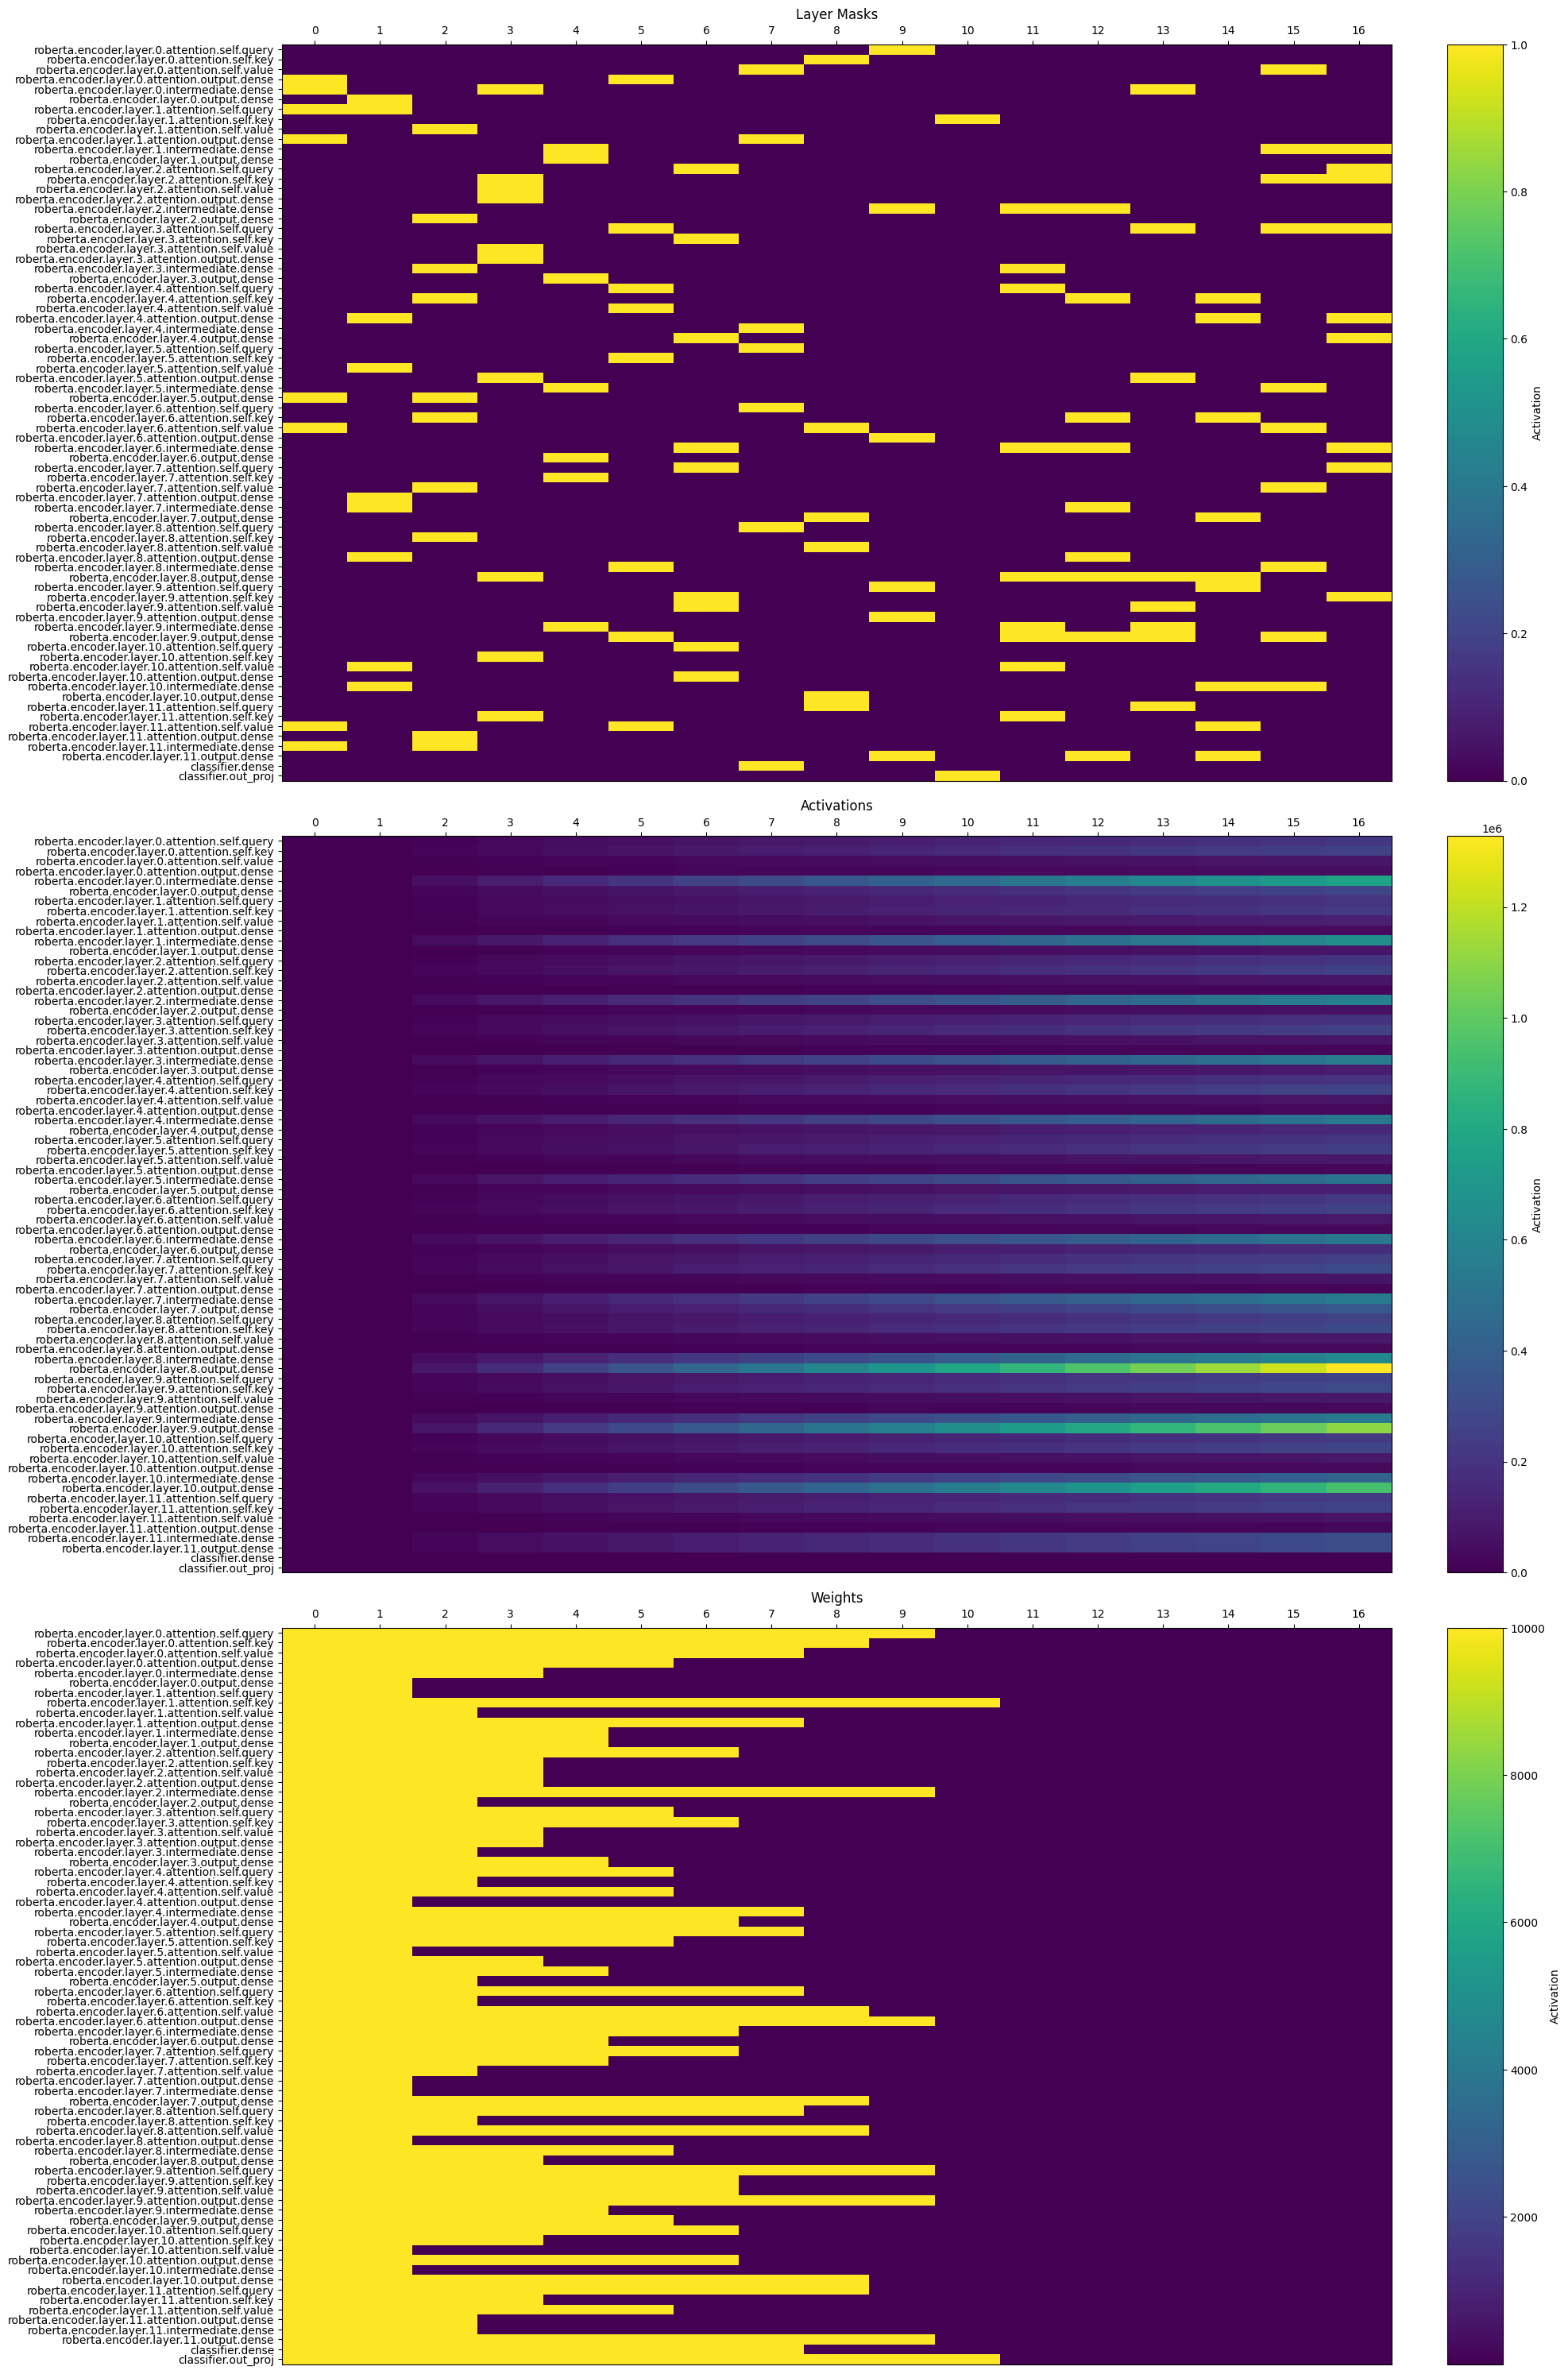

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(20, 30))

plt.title('{} - {} - {}'.format(schedule, allocator, aggregate))
axs[0] = plot_active_layers(data, axs[0])
axs[0].set_title('Layer Masks')
axs[1] = plot_activations(data, axs[1], key='acts')
axs[1].set_title('Activations')
axs[2] = plot_activations(data, axs[2], key='weights')
axs[2].set_title('Weights')
plt.tight_layout()
plt.show()